In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
planets = sns.load_dataset('planets')

# Style Bar
Allows you to create a barplot of numerical column inside your Data Frame.

In [4]:
planets.head(10)[['method','year','distance']].sort_values(by='distance').style.bar(color= 'lightblue',subset='distance').hide_index()

method,year,distance
Radial Velocity,2002,18.150000
Radial Velocity,2011,19.840000
Radial Velocity,1996,21.410000
Radial Velocity,2008,56.950000
Radial Velocity,2008,73.100000
Radial Velocity,2010,74.790000
Radial Velocity,2008,76.390000
Radial Velocity,2006,77.400000
Radial Velocity,2007,110.620000
Radial Velocity,2009,119.470000


# QCut
qcut function would bin the continuous variable where the bin size would be equal-sized based on rank or based on sample quantile.

In [5]:
mpg = sns.load_dataset('mpg')
pd.qcut(x=mpg['mpg'],q=4,labels = [1,2,3,4])

0      2
1      1
2      2
3      1
4      1
      ..
393    3
394    4
395    4
396    3
397    4
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

# Pivot Table
It creates a pivot table based on the categorical object we passed on the columns parameter with the values parameter accepting numerical values.

In [6]:
tips = sns.load_dataset('tips')
tips.pivot_table(columns = 'sex',values = 'total_bill',aggfunc = 'mean',index ='size',margins=True)

sex,Male,Female,All
size,,,
1,8.580000,6.796667,7.242500
2,17.104082,15.339483,16.448013
3,24.287083,21.547143,23.277632
4,28.078214,30.278889,28.613514
5,30.122500,29.850000,30.068000
6,41.235000,28.425000,34.830000
All,20.744076,18.056897,19.785943


# AGG
Just like the name, this method creates an aggregation table. It means, we put our intended aggregation in the .agg method and all the numerical columns are processed by the aggregation function which creates the table.

In [7]:
def mean_divided_by_2(col):
    return (col.mean())/2
mpg.agg(['mean','std',mean_divided_by_2])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
mean_divided_by_2,11.757286,2.727387,96.712940,52.234694,1485.212312,7.784045,38.005025


# Melt
This method is a reverse from the pivot method when we break down every value and variable to another table.

In [8]:
tips.melt(id_vars='tip',value_vars='sex')

,tip,variable,value
0,1.01,sex,Female
1,1.66,sex,Male
2,3.50,sex,Male
3,3.31,sex,Male
4,3.61,sex,Female
...,...,...,...
239,5.92,sex,Male
240,2.00,sex,Female
241,2.00,sex,Male
242,1.75,sex,Male


# Style.applymap

In [9]:
def color_below_20_red(value):
    if(type(value)==type('')):
        return 'color:black'
    else:
        color ='red' if value <=20 else 'black'
        return 'color: {}'.format(color)
planets.head(10).style.applymap(color_below_20_red)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.400000,2006
1,Radial Velocity,1,874.774000,2.210000,56.950000,2008
2,Radial Velocity,1,763.000000,2.600000,19.840000,2011
3,Radial Velocity,1,326.030000,19.400000,110.620000,2007
4,Radial Velocity,1,516.220000,10.500000,119.470000,2009
5,Radial Velocity,1,185.840000,4.800000,76.390000,2008
6,Radial Velocity,1,1773.400000,4.640000,18.150000,2002
7,Radial Velocity,1,798.500000,nan,21.410000,1996
8,Radial Velocity,1,993.300000,10.300000,73.100000,2008
9,Radial Velocity,2,452.800000,1.990000,74.790000,2010


# select_dtypes
This method is used to select the columns in our Data Frame based on the specific data type. For example 'number' or 'object'.

In [10]:
mpg.select_dtypes('object')

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
...,...,...
393,usa,ford mustang gl
394,europe,vw pickup
395,usa,dodge rampage
396,usa,ford ranger


In [11]:
mpg.select_dtypes('number')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


# Style.hide_index and style.hide_columns.

In [12]:
mpg.head(10).style.hide_index().hide_columns(['mpg','origin'])

cylinders,displacement,horsepower,weight,acceleration,model_year,name
8,307.000000,130.000000,3504,12.000000,70,chevrolet chevelle malibu
8,350.000000,165.000000,3693,11.500000,70,buick skylark 320
8,318.000000,150.000000,3436,11.000000,70,plymouth satellite
8,304.000000,150.000000,3433,12.000000,70,amc rebel sst
8,302.000000,140.000000,3449,10.500000,70,ford torino
8,429.000000,198.000000,4341,10.000000,70,ford galaxie 500
8,454.000000,220.000000,4354,9.000000,70,chevrolet impala
8,440.000000,215.000000,4312,8.500000,70,plymouth fury iii
8,455.000000,225.000000,4425,10.000000,70,pontiac catalina
8,390.000000,190.000000,3850,8.500000,70,amc ambassador dpl


# hist

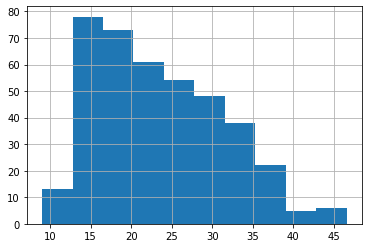

In [13]:
mpg['mpg'].hist()

# Get_Dummies

The get_dummies function is used to create new features based on the categorical class in one variable with the value of the new features is 0 or 1; 0 mean not present, 1 mean present.

One Hot Encoding mostly used when you need to transform your categorical data into numerical.

In [14]:
pd.get_dummies(mpg['origin'])

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


# .query
This method allows selection using a string expression.

In [15]:
mpg.query("mpg <= 11 & origin == 'usa'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


# .mask
It is used to replace specific values with another value that meets the condition given.

In [16]:
mpg['mpg'].mask(mpg['mpg'] <20, 'More than 20')

0      More than 20
1      More than 20
2      More than 20
3      More than 20
4      More than 20
           ...     
393              27
394              44
395              32
396              28
397              31
Name: mpg, Length: 398, dtype: object

# Crosstab
This function would help us to create a pivot table of categorical classes with an aggregation function of a numerical column as the values, although you could also create a count between categorical classes as well.

In [17]:
pd.crosstab(index = mpg['origin'],columns =mpg['model_year'],values = mpg['mpg'],aggfunc='mean')

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


# .apply
This method accepting a function and applied it to the whole data (either in row ways or columns way). What the function return is the result.

In [18]:
mpg ['name'].apply(lambda x: len(str(x)))

0      25
1      17
2      18
3      13
4      11
       ..
393    15
394     9
395    13
396    11
397    10
Name: name, Length: 398, dtype: int64

# factorize
The numerical array you just see is the classes in the categorical variable encoded as a numerical value. How to know which number represents what class? That is why we also get unique classes.

In the sample below 0 is usa, 1 is japan, and 2 is europe. Just like the unique position.

In [19]:
mpg['origin'].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2,
        0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1,
        2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 

# Scatter Matrix
This is a simple function but quite useful in our data analysis life. The main thing is simple, it creates a scatter plot between all the numerical variables within your data frame.

For the plot in the diagonal position (the variable within themselves) would be a distribution plot (either histogram or KDE).

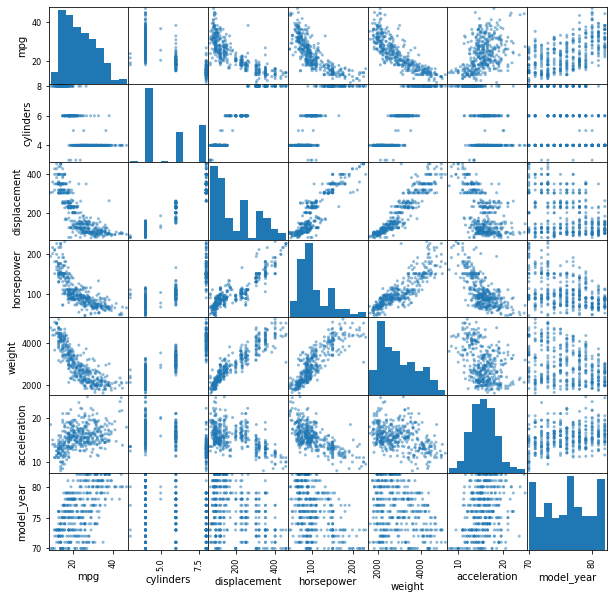

In [20]:
pd.plotting.scatter_matrix(mpg,figsize=(10,10))
plt.show()

# BoxPlot
a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

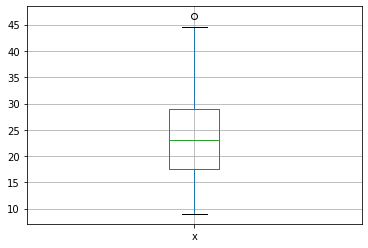

In [21]:
pd.plotting.boxplot(mpg['mpg'])

# To be continued..

Credits --> [Cornellius Yudha Wijaya](https://www.linkedin.com/in/cornellius-yudha-wijaya/)